# Iowa Analysis using Machine Learning Techniques

## Table of Contents
- Model Settings
- Linear Regression
- Logistic Regression
- Decision Tree
- Penalized Linear Regression
    - Visualizing Ridge
    - Visualizing Lasso
    - Visualizing Elastic Net
- RandomForest

### Model Settings

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [242]:
# Numerical and Catagorical Data
r_df = pd.read_csv('output_df_train_V2.csv')
r_mo = pd.read_csv('output_df_test.csv')

# Numerical (Catagorical data dummified)
df = pd.read_csv('output_df2_train.csv')
mo = pd.read_csv('output_df2_test.csv')

In [98]:
# Columns must match. Use this to confirm

df1 = df.copy()
df1 = df1.drop(['SalePrice'], axis = 1)

mo1 = mo.copy()
#mo1 = mo1.drop(['MSZoning_Other'], axis= 1)

print('train columns', df1.shape[1])
print('test columns\n', mo1.shape[1])
print('Column number and name of train.csv')

for i in range( df1.columns.shape[0]):
#for i in range( df1.columns.shape[0]-1,0,-1 ):
    if df1.columns[i] in mo1.columns:
        print(i,'{}: matches'.format(df1.columns[i]) )
    else:
        print(i,'{}: train csv'.format(df1.columns[i]) ,df1.columns[i], 'not found in test csv')
        mo1 = mo1.drop([mo1.columns[i] ], axis = 1)
        print('{} dropped'.format(df1.columns[i]) )

print('train columns', df1.shape[1])
print('test columns', mo1.shape[1])

train columns 82
test columns
 82
Column number and name of train.csv
0 Id: matches
1 MSSubClass: matches
2 LotFrontage: matches
3 LotArea: matches
4 OverallQual: matches
5 MasVnrArea: matches
6 BsmtFinSF1: matches
7 TotalBsmtSF: matches
8 X1stFlrSF: matches
9 X2ndFlrSF: matches
10 GrLivArea: matches
11 FullBath: matches
12 BedroomAbvGr: matches
13 TotRmsAbvGrd: matches
14 GarageCars: matches
15 GarageArea: matches
16 YrDiffSoldBuilt: matches
17 YrDiffRemodBlt: matches
18 YrDiffSoldRemod: matches
19 TotalBath: matches
20 YrDiffGarageBlt: matches
21 FrontAreaSF: matches
22 MSZoning_FV: matches
23 MSZoning_RH: matches
24 MSZoning_RL: matches
25 LotShape_IR2: matches
26 LotShape_Reg: matches
27 LandContour_HLS: matches
28 LandContour_Low: matches
29 LandContour_Lvl: matches
30 Neighborhood_B: matches
31 Neighborhood_C: matches
32 Neighborhood_D: matches
33 Neighborhood_E: matches
34 Neighborhood_F: matches
35 BldgType_B: matches
36 BldgType_C: matches
37 HouseStyle_B: matches
38 HouseStyl

In [243]:
#Normalize by log(price + 1)
df.SalePrice = np.log1p(df.SalePrice)

In [244]:
# Settings for train X and Y
drop = ['Id','SalePrice']

x = df.drop(drop,axis =1)
y = df.SalePrice

In [245]:
# Settings for test.csv X 
testX = mo.drop(['Id'], axis = 1)

In [102]:
print(x.shape)
print(testX.shape)

(1450, 81)
(1459, 81)


In [103]:
# split the train data (total observation) to test/train by 30/70 
nrow = x.shape[0]
third_nrow = int(nrow *.3)

np.random.seed(1)
testIdx = np.random.choice(range(nrow), size=third_nrow, replace=False)
trainIdx = list(set(range(nrow))-set(testIdx))

trainX1 = x.iloc[trainIdx]
trainY1 = y.iloc[trainIdx]

testX1 = x.iloc[testIdx]
testY1 = y.iloc[testIdx]

In [104]:
# Another method to split data
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

### Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lm = LinearRegression()

In [108]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
# Linear regression Analysis
lm.coef_
lm.intercept_
print (lm.score(X_test, Y_test) )#R2

0.8845853822109052


In [110]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
Answer = np.expm1(lm.predict(testX) )
lm_submission = pd.DataFrame( {'Id' : mo.Id, 'SalePrice': Answer})
lm_submission.head()

,Id,SalePrice
0,1461,115309.115949
1,1462,157311.071483
2,1463,177223.670226
3,1464,196247.502281
4,1465,195532.574100


In [113]:
Answer

array([115309.11594921, 157311.07148261, 177223.6702261 , ...,
       175166.06785991, 115357.56657021, 222880.79006682])

In [ ]:
submission.to_csv('submission.csv', index = False)

### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
log = LogisticRegression()

In [119]:
from sklearn import metrics, svm
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

In [120]:
lab_enc = LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[411 339 441 ... 525 199 221]
continuous
multiclass
multiclass


In [121]:
log.fit(x, training_scores_encoded)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
log.coef_
log.intercept_
log.score(x,training_scores_encoded)

0.7993103448275862

In [125]:
Answer = np.expm1 (log.predict(testX) )
log_submission = pd.DataFrame( {'Id' : mo.Id, 'SalePrice': Answer })
log_submission.head()

,Id,SalePrice
0,1461,2.688117e+43
1,1462,1.511428e+111
2,1463,2.335970e+136
3,1464,1.817649e+117
4,1465,3.292198e+158


In [113]:
Answer

array([147000, 157900, 185000, ..., 178400,  93500, 171000])

### Penalized Linear Regression

This is used to add weight to the RSS (model), by minimizing beta

In [126]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [127]:
ridge = Ridge()
lasso = Lasso()
net = ElasticNet()

#### Visualizing Ridge

In [132]:
ridge.set_params(alpha = 0.00023)
ridge.fit(x,y)

Ridge(alpha=0.00023, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
ridge.score(x,y)

0.9132600573071633

In [138]:
coef =[]
intercept =[]
R2 = []
lambda_range = np.linspace(1e-3,200,20)
for lambda_ in lambda_range:
    ridge.set_params(alpha = lambda_)
    ridge.fit(x,y)
    intercept.append(ridge.intercept_)
    coef.append(ridge.coef_)
    R2.append(ridge.score(x,y))

Text(0.5, 1.0, "Model's Intercept with increasing weight")

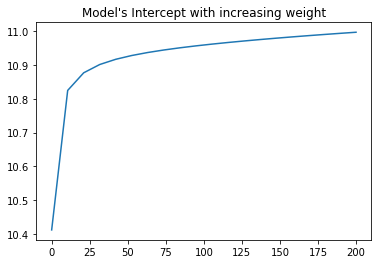

In [139]:
plt.plot(lambda_range, intercept)
plt.title("Model's Intercept with increasing weight")

Text(0.5, 1.0, 'Change of Ridge slopes varying alpha')

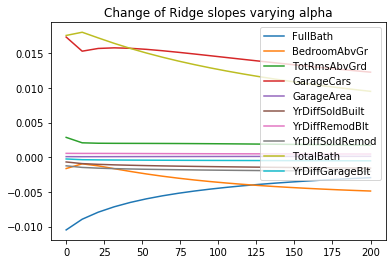

In [143]:
coefs = pd.DataFrame(np.array(coef), columns = x.columns)

for name in coefs.columns[10:20]:
    plt.plot(lambda_range, coefs[name], label = name)
plt.legend(loc =1)
plt.title("Change of Ridge slopes varying alpha")

Text(0.5, 1.0, 'Change of $R^2$ varying alpha')

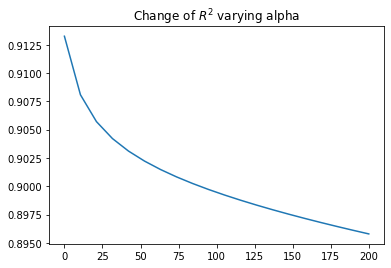

In [144]:
plt.plot(lambda_range, R2)
plt.title("Change of $R^2$ varying alpha")

In [149]:
train_R2=[]
test_R2=[]

lambda_range = np.linspace(1e-3,100,20)
for lambda_ in lambda_range:
    ridge.set_params(alpha = lambda_, normalize = False)
    ridge.fit(X_train, Y_train)
    train_R2.append(ridge.score(X_train, Y_train))
    test_R2.append(ridge.score(X_test, Y_test))

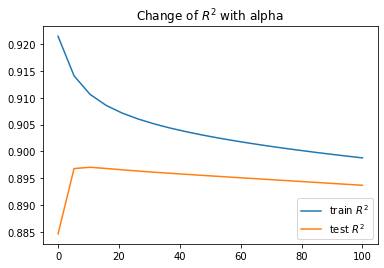

In [150]:
plt.plot(lambda_range, train_R2, label = 'train $R^2$')
plt.plot(lambda_range, test_R2, label = 'test $R^2$')
plt.title("Change of $R^2$ with alpha ")
plt.legend(loc = 4)

In [17]:
ridge.set_params(alpha = 25) # alpha set to where the train and test R2 meet
ridge.fit(x, y)
coefDF = pd.Series(ridge.coef_ , index = x.columns)
print('The intercept is %.4f'%(ridge.intercept_) )
print('Slopes are %s'%(coefDF))

The intercept is 30287.2907
Slopes are MSSubClass            -80.543282
LotFrontage           -20.895000
LotArea                 1.021619
OverallQual         12457.136281
MasVnrArea             26.045797
                        ...     
GarageFinish_RFn    -4083.277235
GarageFinish_Unf    -1373.844440
PavedDrive_Paved     4253.904994
X2ndFlrYN_Yes       -5431.998529
HalfBathYN_Yes       4339.931315
Length: 78, dtype: float64


In [258]:
ridge.set_params(alpha = 1, normalize = True)
ridge.fit(x,y)

ridge_coef = ridge.coef_
coef_df = pd.DataFrame( data = ridge_coef, columns = ['Coefficient'])
col_df = pd.DataFrame( data = x.T.index, columns =['Features'])
ridge_df = pd.concat( [col_df, coef_df], axis = 1 )

ridge_df = ridge_df.sort_values(by='Coefficient', ascending=False)

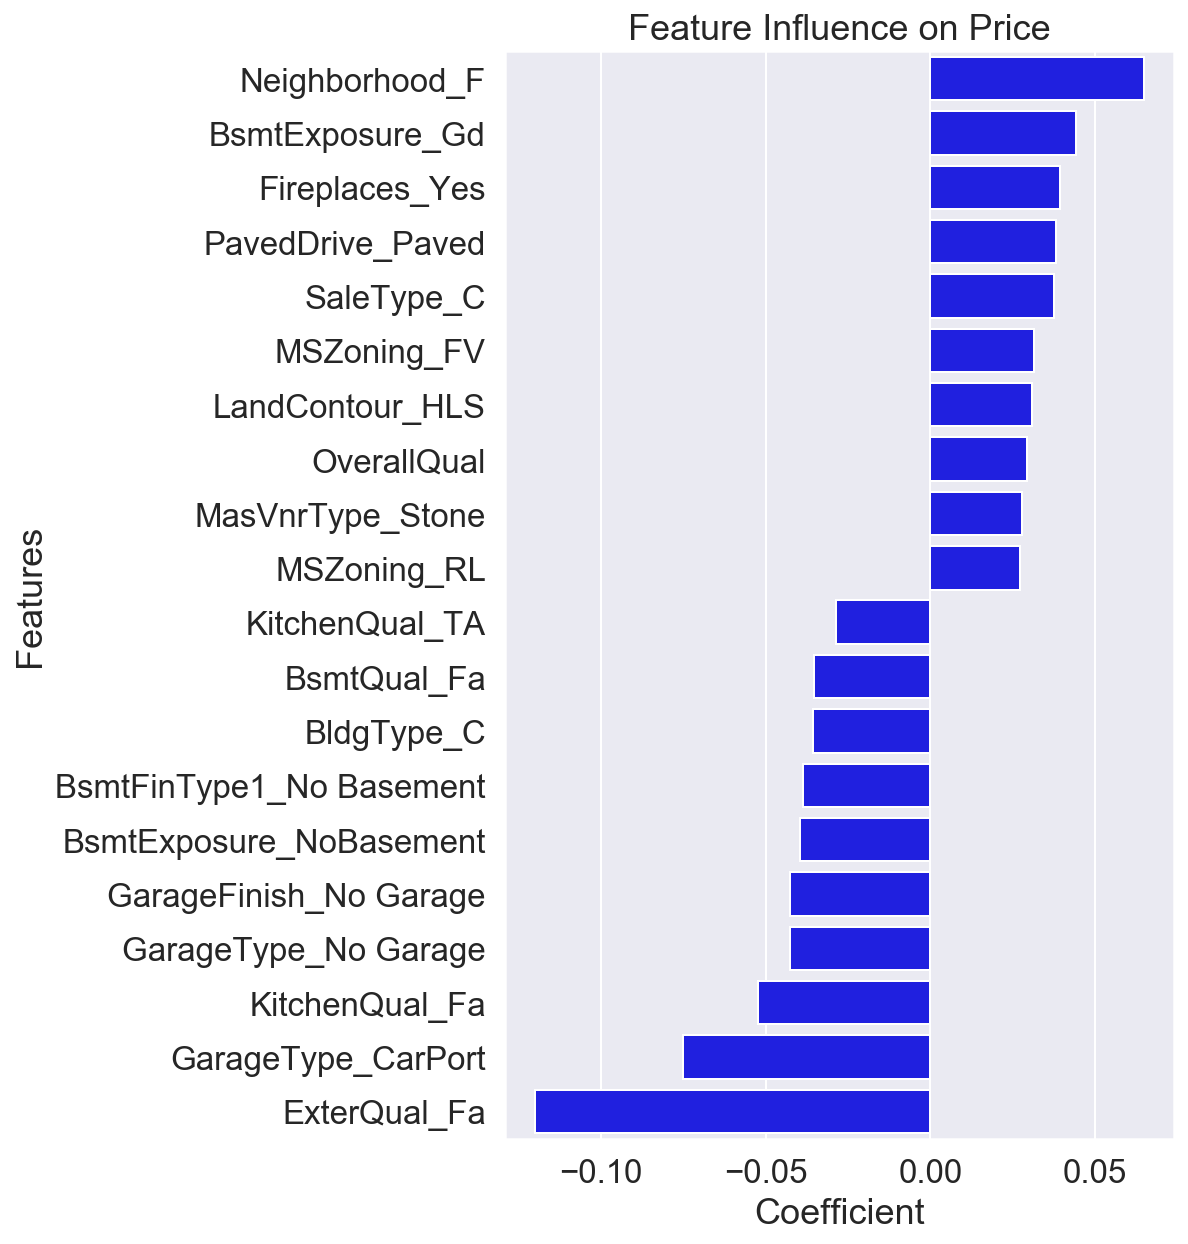

In [259]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize = (6,10) )
display_coef = pd.concat( [ ridge_df.head(10) , ridge_df.tail(10)] )
sns.set_color_codes('pastel')
sns.barplot(x = 'Coefficient',
            y = 'Features',
            data = display_coef,
            color = 'blue'
           )
plt.title('Feature Influence on Price')
plt.show()

In [260]:
ridge_answer = np.expm1( ridge.predict(testX) )

In [261]:
ridge_answer

array([116956.78614183, 154669.5436968 , 182401.61005089, ...,
       176079.45526862, 114968.50549261, 216183.06836848])

In [257]:
ridge.fit(X_train, Y_train)
ridge.score(X_test, Y_test)

0.8775450723413668

### Visualizing Lasso
Lasso function here is very usualful because betas with multicollinearity will be reduced by minimization

In [152]:
lasso.set_params(alpha =0.000236, normalize = True) #Originally it was 1 but changed based on gridsearch

Lasso(alpha=0.000236, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
lasso.fit(x,y)
print('Lasso score is %.4f'%(lasso.score(x,y)) )
print('Intercept is %.4f'%(lasso.intercept_) )
lasso_coef = pd.Series(lasso.coef_ , index = x.columns)
print('Slopes: \n%s'%(lasso_coef))

Lasso score is 0.8961
Intercept is 10.8394
Slopes: 
MSSubClass                 -0.000000e+00
LotFrontage                 1.477476e-04
LotArea                     4.167796e-06
OverallQual                 8.170461e-02
MasVnrArea                  0.000000e+00
BsmtFinSF1                  7.834825e-05
TotalBsmtSF                 9.573142e-05
X1stFlrSF                   0.000000e+00
X2ndFlrSF                   0.000000e+00
GrLivArea                   2.181481e-04
FullBath                    0.000000e+00
BedroomAbvGr                0.000000e+00
TotRmsAbvGrd                0.000000e+00
GarageCars                  2.293296e-02
GarageArea                  7.422857e-05
YrDiffSoldBuilt            -8.088866e-04
YrDiffRemodBlt             -0.000000e+00
YrDiffSoldRemod            -1.936790e-03
TotalBath                   2.118135e-02
YrDiffGarageBlt            -0.000000e+00
FrontAreaSF                 7.349207e-05
MSZoning_FV                 3.834154e-02
MSZoning_RH                -0.000000e+00
MSZon

In [166]:
coef = []
intercept = []
R2 = []

lambda_range = np.linspace(1e-7, 1e-2, 20)
for lambda_ in lambda_range:
    lasso.set_params(alpha = lambda_ , normalize = True)
    lasso.fit(x,y)
    intercept.append(lasso.intercept_)
    coef.append(lasso.coef_)
    R2.append(lasso.score(x,y))

Text(0.5, 1.0, 'Change of Lasso intercept with alpha')

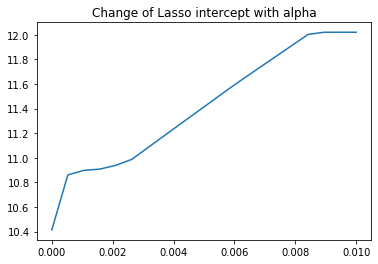

In [167]:
plt.plot(lambda_range, intercept)
plt.title('Change of Lasso intercept with alpha')

Text(0.5, 1.0, 'Change of Lasso Slopes with alpha')

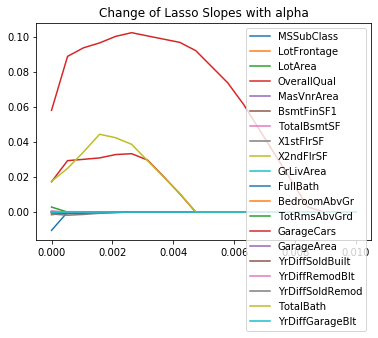

In [168]:
coefs = pd.DataFrame(np.array(coef), columns = x.columns)

for name in coefs.columns[:20]:
    plt.plot(lambda_range, coefs[name], label = name)
plt.legend(loc =1)
plt.title('Change of Lasso Slopes with alpha')

In [171]:
train_R2=[]
test_R2=[]

lambda_range = np.linspace(1e-7,1e-1,20)
for lambda_ in lambda_range:
    lasso.set_params(alpha = lambda_ , normalize = False)
    lasso.fit(X_train, Y_train)
    train_R2.append(lasso.score(X_train, Y_train))
    test_R2.append(lasso.score(X_test, Y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.003846709547226, tolerance: 0.015306967658918674
  positive)


Text(0.5, 1.0, '$R^2$ with alpha')

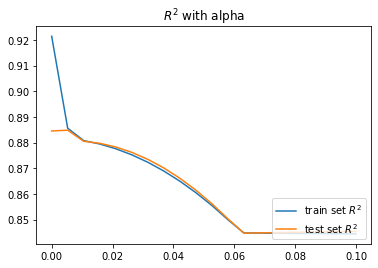

In [172]:
plt.plot(lambda_range, train_R2, label=r'train set $R^2$')
plt.plot(lambda_range, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)
plt.title('$R^2$ with alpha')

In [74]:
lasso.set_params(alpha = 0.00013, normalize = True)
lasso.fit(x,y)

Lasso(alpha=0.00013, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
lasso_answer = np.expm1( lasso.predict(testX) )
lasso_df = pd.DataFrame( data = lasso_answer, columns = ['SalePrice'])
lasso_submission = pd.concat( [mo.Id, lasso_df], axis = 1 )
lasso_submission.head(5)

,Id,SalePrice
0,1461,113649.489591
1,1462,166053.889827
2,1463,169915.700652
3,1464,194392.600994
4,1465,203885.048900


In [ ]:
lasso_answer

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from math import sqrt

In [85]:
# run 15 k-fold splits on the training data
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=42)
# Create the hyperparameter grid
param_grid = {'alpha': np.linspace(1e-10, 1e-3, 200) }
# Instantiate the Lasso regressor
lasso = Lasso()
# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(lasso, param_grid, cv=15)
# Fit it to the training data
gm_cv.fit(X_train, y_train)
# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.398223485495298, tolerance: 0.012731455872495755
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.493776132518112, tolerance: 0.012689276930124714
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.379369126982529, tolerance: 0.012594215872672062
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

NameError: name 'mean_squared_error' is not defined

In [89]:
mse = mean_squared_error(y_test, y_pred)
print("Tuned Lasso Alpha: {}".format(gm_cv.best_params_))
print("Tuned Lasso R squared: {}".format(r2))
print("Tuned Lasso RMSE: {}".format(sqrt(mse)))

Tuned Lasso Alpha: {'alpha': 0.00023618098090452262}
Tuned Lasso R squared: 0.8965871829228858
Tuned Lasso RMSE: 0.1279798433014368


In [174]:
lasso.set_params(alpha = 0.000236, normalize = True)
lasso.fit(x,y)

Lasso(alpha=0.000236, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [201]:
lasso_coef = lasso.coef_
coef_df = pd.DataFrame( data = lasso_coef, columns = ['Coefficient'])
col_df = pd.DataFrame( data = x.T.index, columns =['Features'])
lasso_df = pd.concat( [col_df, coef_df], axis = 1 )

pd.set_option('display.max_rows', 1500)
lasso_df = lasso_df.sort_values(by='Coefficient', ascending=False)
lasso_df

,Features,Coefficient
3,OverallQual,8.170461e-02
23,MSZoning_RL,5.984140e-02
78,SaleType_C,4.470248e-02
21,MSZoning_FV,3.834154e-02
76,PavedDrive_Paved,3.548487e-02
66,Fireplaces_Yes,3.399195e-02
54,BsmtExposure_Gd,2.916188e-02
33,Neighborhood_F,2.812392e-02
60,HeatingQC_Excellent,2.661285e-02
13,GarageCars,2.293296e-02


In [176]:
lasso_answer = np.expm1( lasso.predict(testX) )
lasso_df = pd.DataFrame( data = lasso_answer, columns = ['SalePrice'])
lasso_submission = pd.concat( [mo.Id, lasso_df], axis = 1 )
lasso_submission.head(5)

,Id,SalePrice
0,1461,112063.313708
1,1462,155047.574563
2,1463,173375.967611
3,1464,190195.586037
4,1465,196093.926828


In [202]:
# Number of Coefficients at 0
lasso_df.loc[lasso_df.Coefficient == 0].shape

(47, 2)

In [93]:
lasso_submission.to_csv('submission2.csv', index = False) # Kaggle Score 0.14294, rank 2440

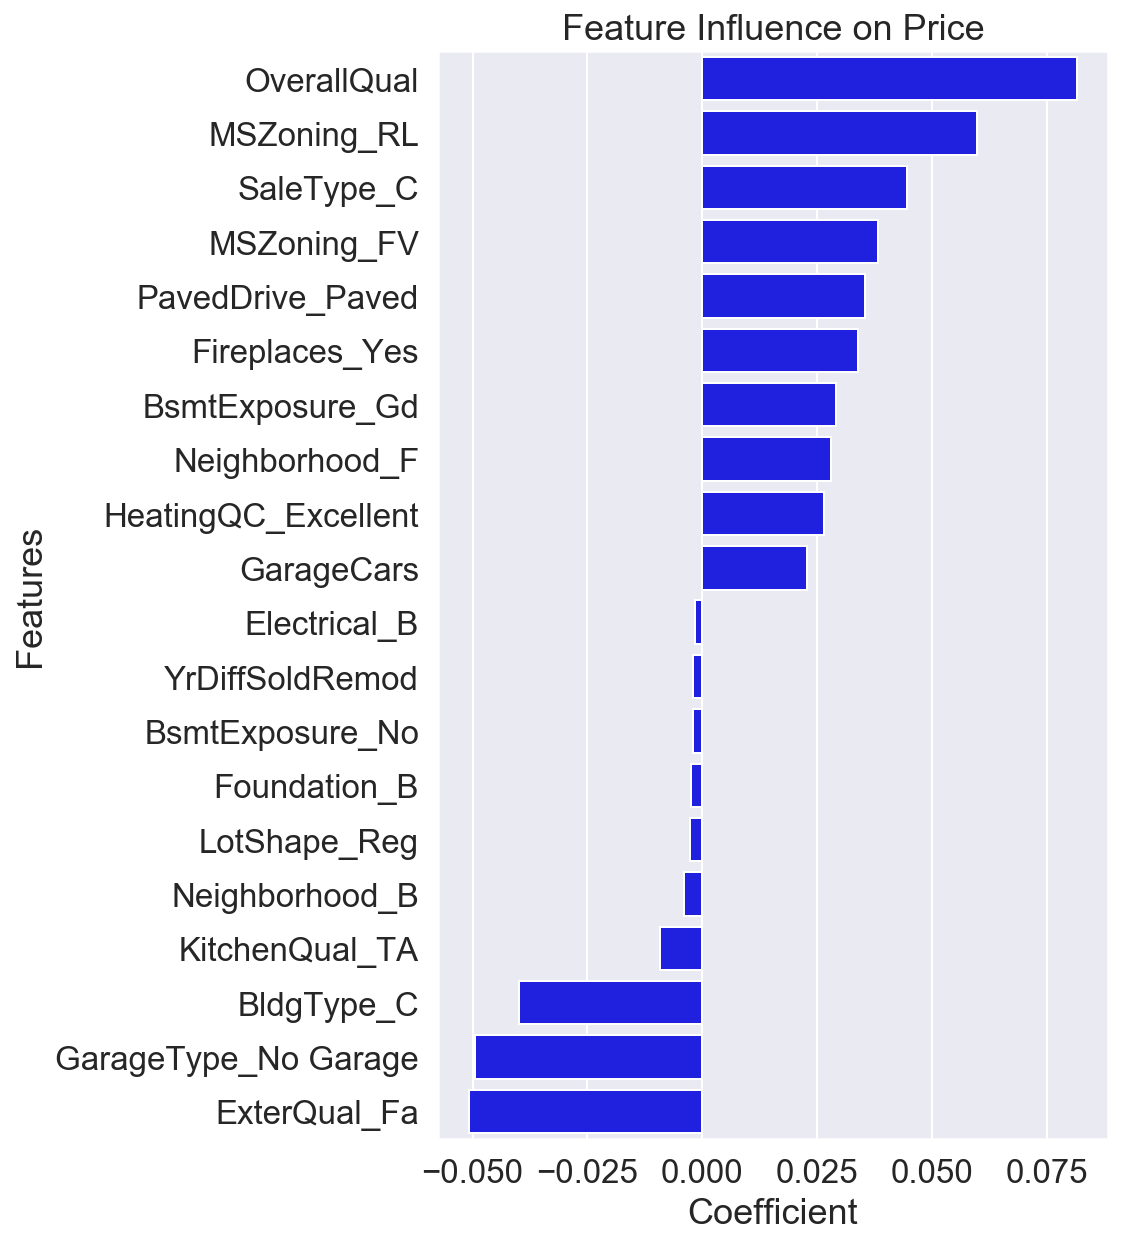

In [203]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize = (6,10) )
display_coef = pd.concat( [ lasso_df.head(10) , lasso_df.tail(10)] )
sns.set_color_codes('pastel')
sns.barplot(x = 'Coefficient',
            y = 'Features',
            data = display_coef,
            color = 'blue'
           )
plt.title('Feature Influence on Price')
plt.show()

### Visualizing ElasticNet

In [239]:
lambda_size = 40
rho_size = 30
lambda_range = np.linspace(1e-2, 200, lambda_size)
rho_range = np.linspace(0.01, 1, rho_size)

trainR2 = np.zeros( (lambda_size, rho_size) )
testR2 = np.zeros( (lambda_size, rho_size) )
intercepts = np.zeros( (lambda_size, rho_size) )
coefs = np.zeros( (lambda_size, rho_size) )

In [240]:
net.set_params(normalize = True)

for lambda_i, lambda_ in enumerate(lambda_range):
    for rho_i, rho in enumerate(rho_range):
        net.set_params(alpha =lambda_ , l1_ratio = rho)
        net.fit(x, y)
        trainR2[lambda_i, rho_i] = net.score(X_train , Y_train)
        testR2[lambda_i, rho_i] = net.score(X_test, Y_test)
        intercepts[lambda_i, rho_i] = net.intercept_
        coefs = net.coef_

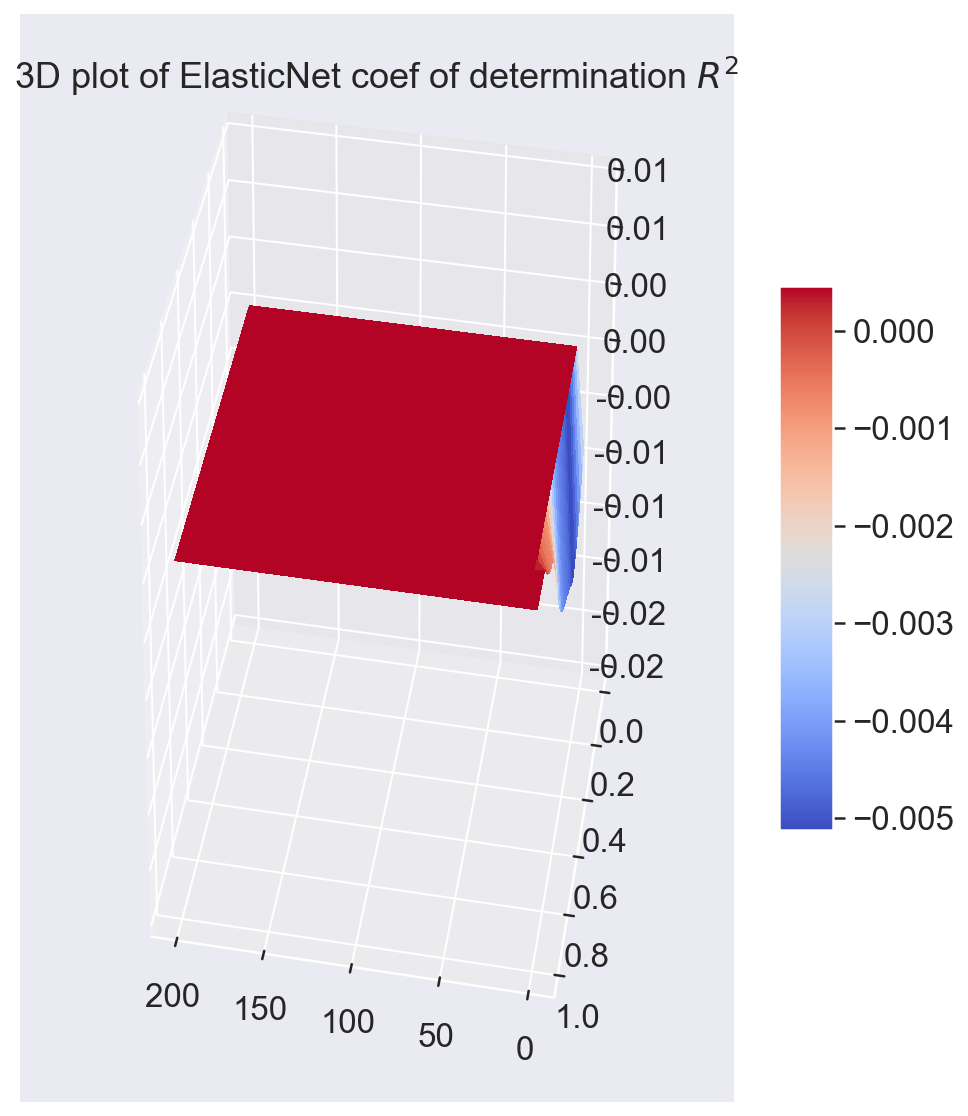

In [206]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data

x = lambda_range
y = rho_range
X, Y = np.meshgrid(x, y)
Z = (trainR2-testR2).T
# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(np.min(Z) - 0.01, np.max(Z) + 0.01)
ax.view_init(30, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.title(r'3D plot of ElasticNet coef of determination $R^2$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

In [262]:
net.set_params(alpha = 1, normalize = True)
net.fit(x,y)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=1.0,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
net_coef = net.coef_
coef_df = pd.DataFrame( data = net_coef, columns = ['Coefficient'])
col_df = pd.DataFrame( data = x.T.index, columns =['Features'])
net_df = pd.concat( [col_df, coef_df], axis = 1 )

net_df = net_df.sort_values(by='Coefficient', ascending=False)

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize = (6,10) )
display_coef = pd.concat( [ net_df.head(10) , net_df.tail(10)] )
sns.set_color_codes('pastel')
sns.barplot(x = 'Coefficient',
            y = 'Features',
            data = display_coef,
            color = 'blue'
           )
plt.title('Feature Influence on Price')
plt.show()

In [ ]:
net_answer = np.expm1( net.predict(testX) )
net_answer

In [263]:
net.fit(X_train, Y_train)
net.score(X_test, Y_test)

-0.001340577806577814

### Decision Tree

In [207]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
tree = DecisionTreeClassifier()

In [219]:
tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [220]:
tree.feature_importances_[:5]

array([0.01492309, 0.0388775 , 0.05284806, 0.02073939, 0.03872218])

In [221]:
tree.score(x,y)

0.9993103448275862

In [224]:
Answer = tree.predict(testX)
Dtree_df = pd.DataFrame( data = Answer, columns = ['SalePrice'])
Dtree_submission = pd.concat( [mo.Id, Dtree_df], axis = 1 )
Dtree_submission.head()

,Id,SalePrice
0,1461,144000
1,1462,207500
2,1463,200500
3,1464,200500
4,1465,189000


# XGBoost

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb = XGBClassifier()

In [227]:
from xgboost import DMatrix
from xgboost import cv

In [230]:
dtrain = DMatrix(x, label = y)
dtest = DMatrix(testX)

params = {"max_depth":2, "eta":0.1}
model = cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

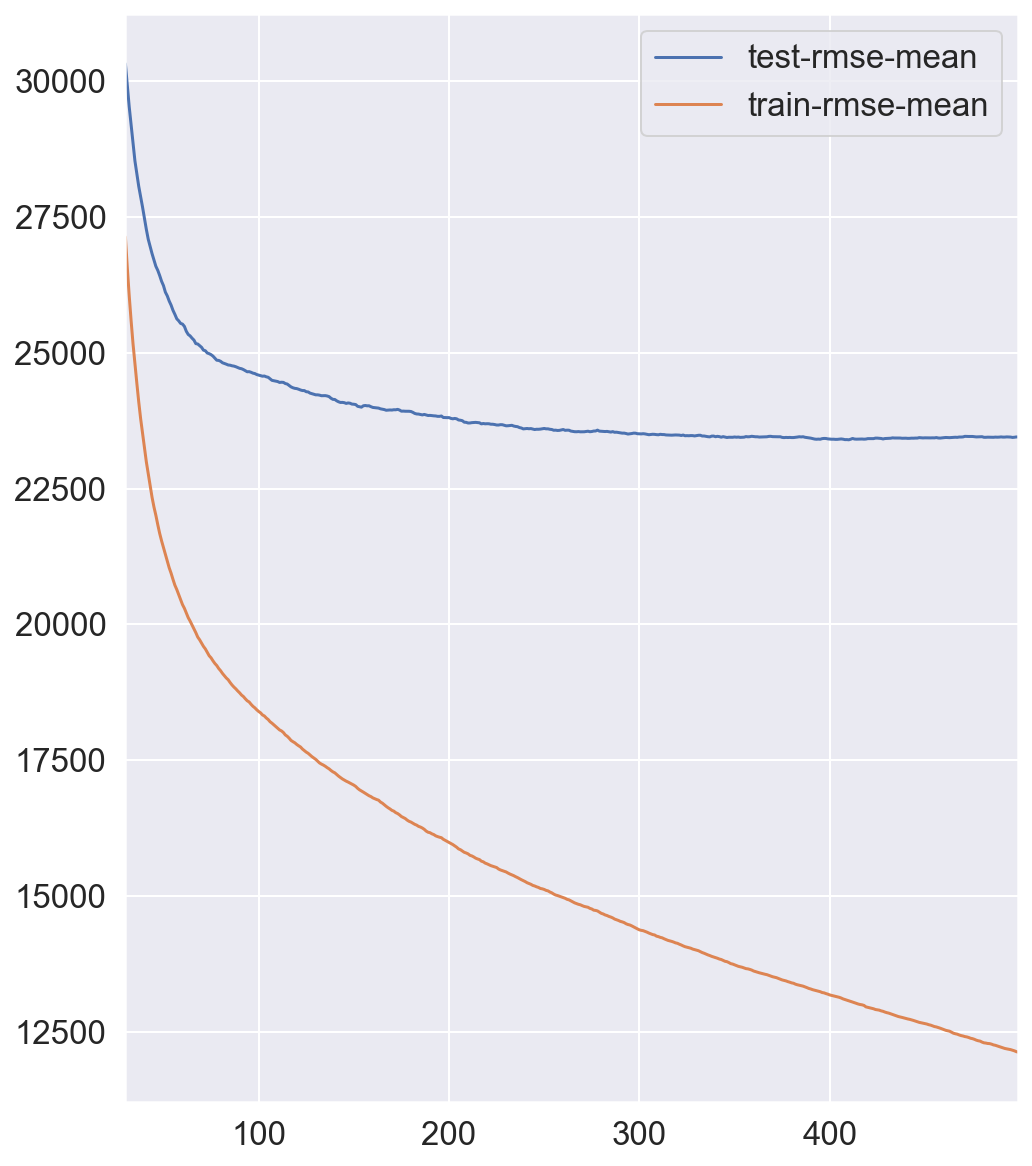

In [231]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [233]:
from xgboost import XGBRegressor

In [234]:
model_xgb = XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)

In [235]:
model_xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=360, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [54]:
xgb.fit(X_train, Y_train) #Trained using dummified data

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [236]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predict))
xgb.score(X_test, Y_test)

NameError: name 'y_predict' is not defined

In [237]:
xg_answer = np.expm1( model_xgb.predict(testX) )

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


In [238]:
xg_df = pd.DataFrame( data = xg_answer, columns = ['SalePrice'])
xg_submission = pd.concat( [mo.Id, xg_df], axis = 1 )
xg_submission.head()

,Id,SalePrice
0,1461,inf
1,1462,inf
2,1463,inf
3,1464,inf
4,1465,inf


In [47]:
drop = ['Id','SalePrice']
r_df.SalePrice = np.log1p(r_df.SalePrice)
#Cleaned training
x = r_df.drop(drop,axis =1)
y = r_df.SalePrice
#Cleaned test
testX = r_mo.drop(['Id'], axis = 1)